In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

In [ ]:
#Simple CNN Model Definition
def build_simple_cnn(input_shape=(128, 128, 1), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#Check for Valid Images
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except:
        return False


In [ ]:
#Load and Label Images
def load_images_from_folders(data_paths, img_size=(128, 128)):
    images, labels = [], []
    label_map = {label: idx for idx, label in enumerate(data_paths)}
    for label_name, folder_path in data_paths.items():
        class_index = label_map[label_name]
        for file in tqdm(os.listdir(folder_path), desc=f"Loading {label_name}"):
            file_path = os.path.join(folder_path, file)
            if is_valid_image(file_path):
                img = Image.open(file_path).convert("L")
                img = img.resize(img_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(class_index)
    X = np.array(images, dtype="float32") / 255.0
    y = to_categorical(np.array(labels), num_classes=len(label_map))
    return X.reshape(-1, 128, 128, 1), y, label_map


In [ ]:
#Define Folder Paths
data_paths = {
    "MeanderPatients": "C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/MeanderPatients",
    "MeanderControl": "C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/MeanderControl",
    "SpiralPatients": "C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/SpiralPatients",
    "SpiralControl": "C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/SpiralControl"
}

In [ ]:
#Load Dataset
X, y, label_map = load_images_from_folders(data_paths)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading SpiralControl: 100%|██████████| 73/73 [00:00<00:00, 162.71it/s]


In [ ]:
#Train SimpleCNN
model = build_simple_cnn(input_shape=(128, 128, 1), num_classes=4)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4140 - loss: 1.8458 - val_accuracy: 0.7838 - val_loss: 0.8166
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7994 - loss: 0.6366 - val_accuracy: 0.7838 - val_loss: 0.4843
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8429 - loss: 0.3792 - val_accuracy: 0.8446 - val_loss: 0.4198
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8125 - loss: 0.3901 - val_accuracy: 0.8176 - val_loss: 0.4152
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8739 - loss: 0.3033 - val_accuracy: 0.8176 - val_loss: 0.4209


In [ ]:
#Predict and Visualize
y_probs = model.predict(X_test)
y_preds = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test, axis=1)
reverse_label_map = {v: k for k, v in label_map.items()}

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


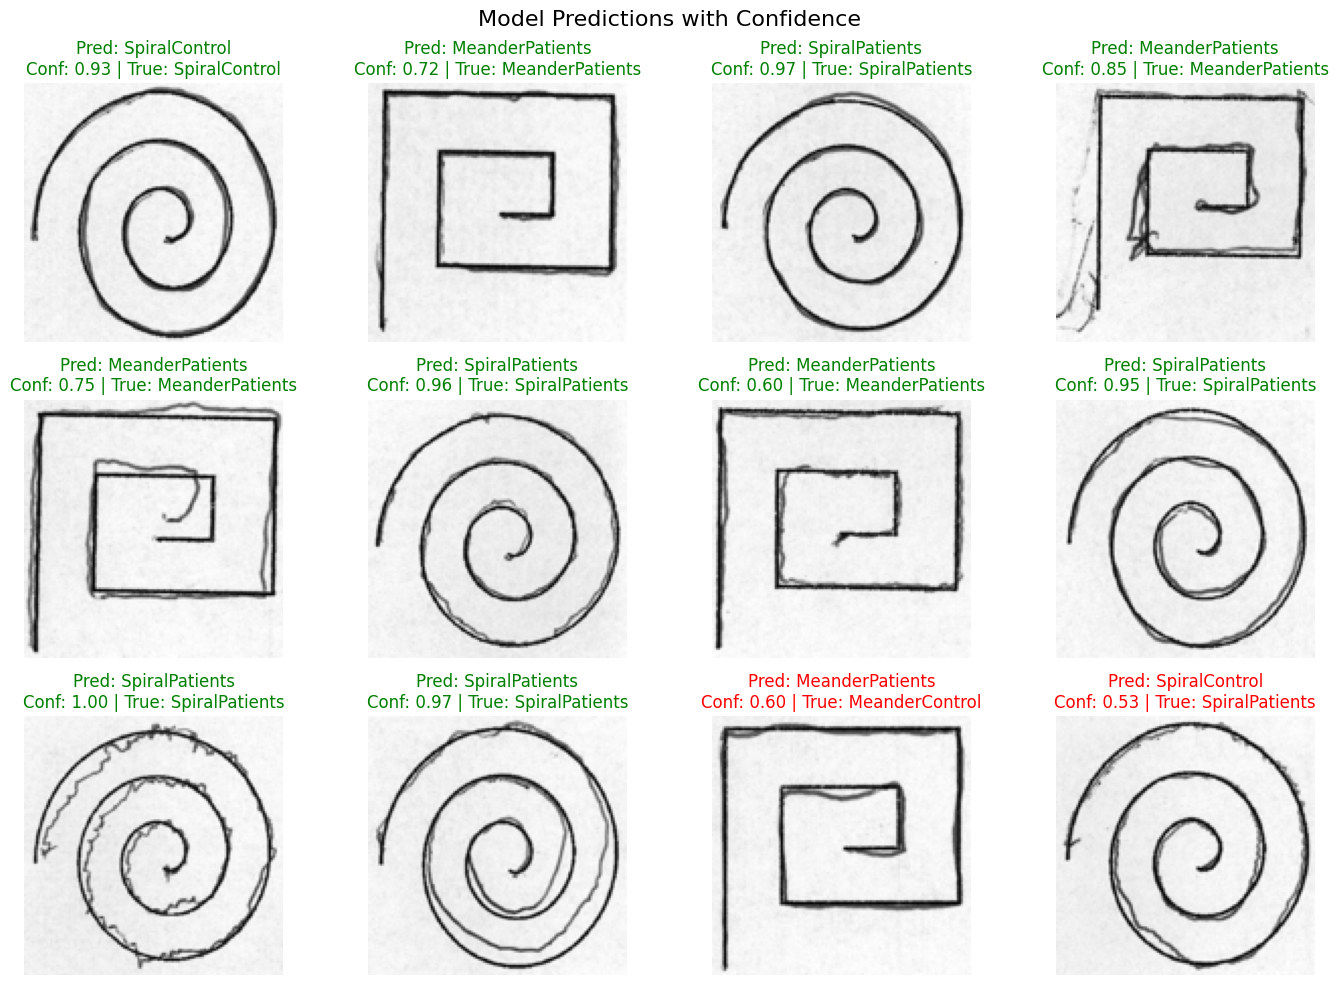

In [ ]:
#Plot with Confidence
plt.figure(figsize=(14, 10))
for i in range(min(12, len(X_test))):
    img = X_test[i].reshape(128, 128)
    pred_label = reverse_label_map[y_preds[i]]
    true_label = reverse_label_map[y_trues[i]]
    conf = y_probs[i][y_preds[i]]
    color = 'green' if pred_label == true_label else 'red'
    
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_label}\nConf: {conf:.2f} | True: {true_label}", color=color)

plt.suptitle("Model Predictions with Confidence", fontsize=16)
plt.tight_layout()

In [ ]:
#Save Output Image
output_img_path = "C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/simplecnn_predictions.png"
plt.savefig(output_img_path)
plt.show()

print(f"✅ Prediction image saved to: {output_img_path}")

<Figure size 640x480 with 0 Axes>

✅ Prediction image saved to: C:/Users/ADMIN/Documents/Document/USTH/B3/mlmed/data/simplecnn_predictions.png


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Convert predictions and ground truth to integer labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_probs, axis=1)

# Overall metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1-score:  {f1:.4f}")


✅ Accuracy:  0.8176
✅ Precision: 0.7720
✅ Recall:    0.6937
✅ F1-score:  0.6871


In [ ]:
#Show full report per class
target_names = list(label_map.keys())
report = classification_report(y_true_labels, y_pred_labels, target_names=target_names)
print("\n📋 Classification Report:\n")
print(report)



📋 Classification Report:

                 precision    recall  f1-score   support

MeanderPatients       0.81      0.98      0.89        61
 MeanderControl       0.80      0.22      0.35        18
 SpiralPatients       0.92      0.85      0.89        55
  SpiralControl       0.56      0.71      0.62        14

       accuracy                           0.82       148
      macro avg       0.77      0.69      0.69       148
   weighted avg       0.83      0.82      0.80       148

